In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Importing necessary modules from scikit-learn for data preprocessing and modeling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('D:/Lambton College/Term-2/Big Data Visualization/Project-1/healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


To address null values in the 'BMI' column, it is advisable to replace them with gender-specific median values. This approach recognizes that BMI is influenced by gender. Therefore, prior to imputing missing values with the median, it is prudent to segregate the dataset into male and female subsets

In [12]:
# Storing column names with categorical and numerical data types
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

# Creating separate datasets for male and female
df_male = df[df.gender == 'Male']  # Male dataset
df_female = df[df.gender == 'Female']  # Female dataset

# Initializing SimpleImputer for missing value imputation using mean strategy
imputer = SimpleImputer(strategy='mean')

#concating both dataset
df=pd.concat([df_male, df_female], ignore_index=True)

In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Exporatory Data Analysis

In [14]:
value_counts = df['stroke'].value_counts()
categories = ['NoStroke','Stroke']
counts = value_counts.values

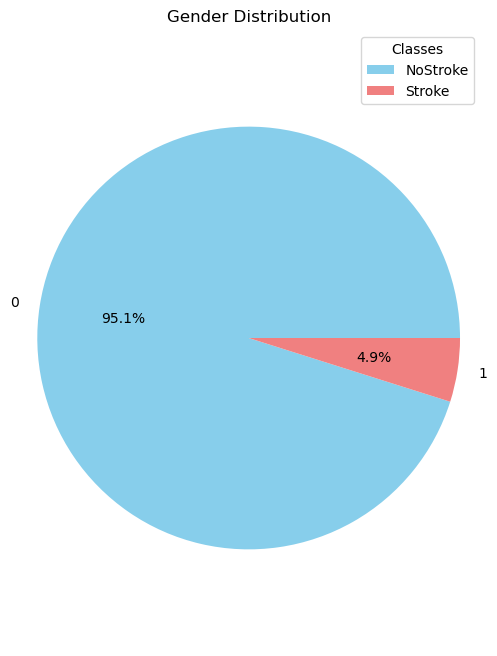

In [15]:
# Create a pie chart
plt.figure(figsize=(6, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(categories, title='Classes')
plt.show()

The pie chart illustrates a significant imbalance in the dataset, with only 4.9% of instances labeled as Stroke and the remaining 95.1% labeled as NoStroke. Due to this substantial class imbalance, training a model on this dataset may lead to biased results.

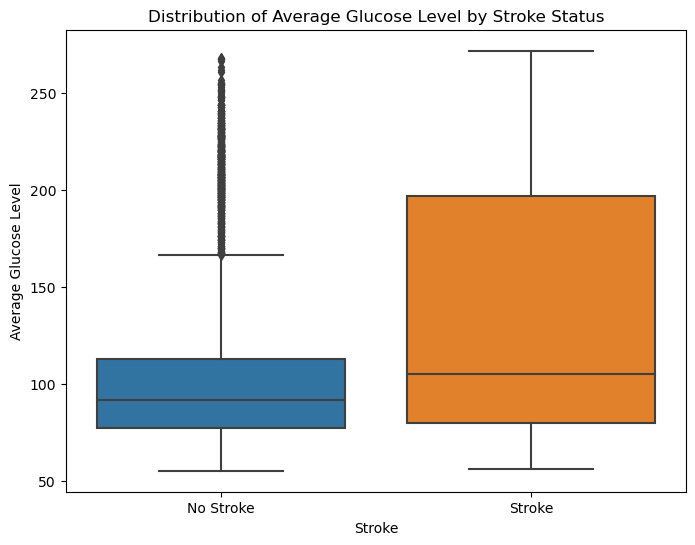

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level')
plt.title("Distribution of Average Glucose Level by Stroke Status")
plt.xlabel("Stroke")
plt.ylabel("Average Glucose Level")
plt.xticks([0, 1], ["No Stroke", "Stroke"])
plt.show()

In [17]:
def plot_relationship(df, x_col, y_col):
    # Check if the columns exist in the DataFrame
    df[y_col] = df[y_col].astype(str)
    # Set a custom color palette
    custom_palette = {'0': 'lightgreen', '1': 'lightblue'}
    # Create a figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Plot count bar chart
    sns.countplot(x=x_col, hue=y_col, data=df, ax=axes[0], palette=custom_palette)
    axes[0].set_title(f'Count of {y_col} for each {x_col}')
    # Plot stacked bar chart
    sns.histplot(x=x_col, hue=y_col, multiple="stack", data=df, ax=axes[1], palette=custom_palette)
    axes[1].set_title(f'Stacked {y_col} distribution for each {x_col}')
    plt.tight_layout()
    plt.show()

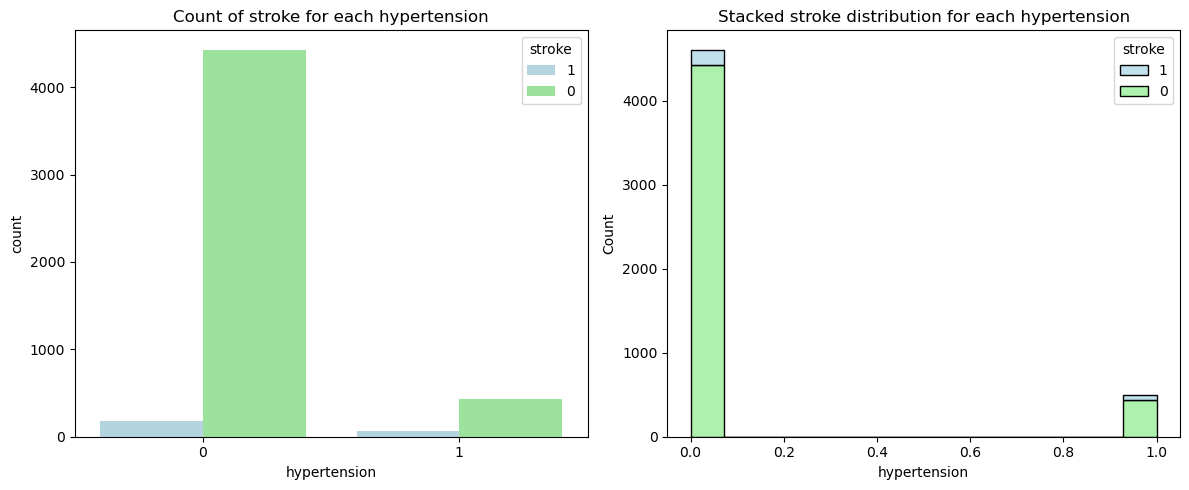

In [18]:
plot_relationship(df,'hypertension','stroke')

The visualization suggests that hypertension alone may not be the predominant factor leading to strokes. The relatively low number of stroke occurrences in relation to hypertension indicates that while hypertension could be a contributing factor to strokes, it is not the sole major cause. It suggests a nuanced relationship where other factors may also play crucial roles in the incidence of strokes.

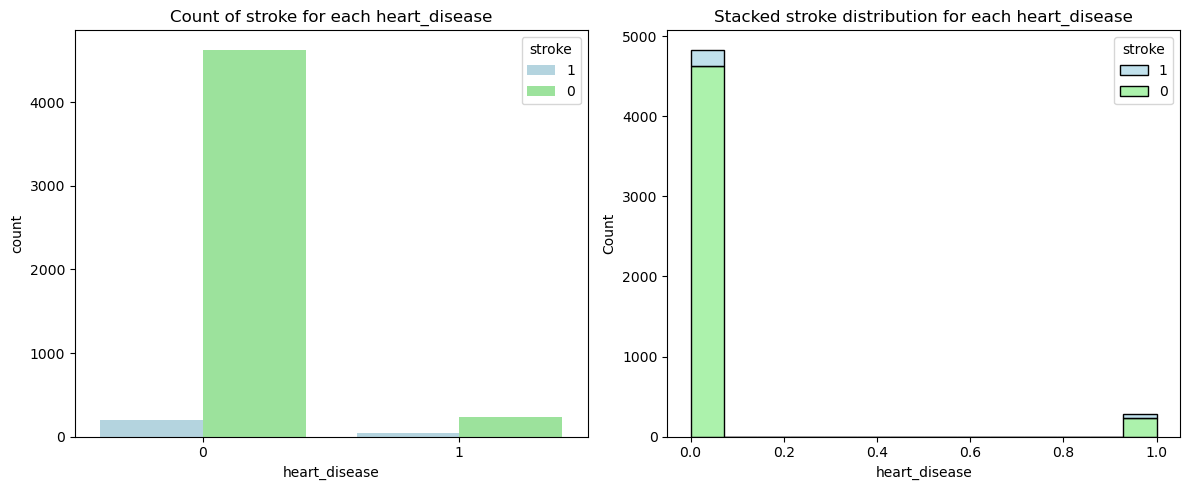

In [19]:
plot_relationship(df,'heart_disease','stroke')

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [21]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
3,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
4,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [22]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000


In [23]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [24]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# label encoding is use to change the data to numberical form

In [25]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [26]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
3,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
4,8213,1,78.0,0,1,1,2,1,219.84,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0


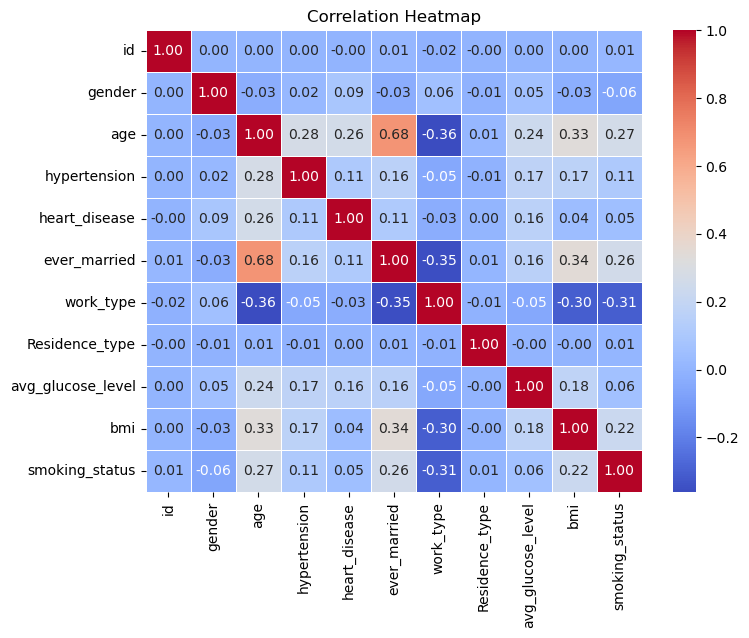

In [27]:
#heatmap is used to show the relatioship between data
correlation_matrix = df.corr()
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [38]:
# Fill missing (NaN) values in the 'bmi' column 
median_bmi=df.bmi.median()
df.bmi=df.bmi.fillna(median_bmi)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
3,53882,1,74.0,1,1,1,2,0,70.09,27.4,2,1
4,8213,1,78.0,0,1,1,2,1,219.84,28.1,0,1


# Training

In [31]:
X=df.drop(['stroke'],axis=1)#features columns 
y=df['stroke']#target column

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
len(X_train)

4087

In [34]:
len(X_test)

1022

In [35]:
len(X)

5109

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Model Selection
# Now you can use the scaled data for modeling
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9422700587084148


An accuracy of 0.942 means that the model correctly predicts the class of the data approximately 94.2% of the time on the test dataset. In other words, out of all the instances in the test set, around 94.2% are correctly classified by the logistic regression model

# Model Implememtation

In [37]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
#classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       963
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.94      0.91      1022



This classification report suggests that the model performs well for class 0 but poorly for class 1, with significant issues of false positives and false negatives for class 1 predictions.
